# ML using KNN

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
print(pd.__version__)

0.22.0


## First Step: Load Data and disassemble for our purposes

In [4]:
df = pd.read_csv('./insurance-customers-300.csv', sep=';')

In [5]:
y=df['group']

In [6]:
df.drop('group', axis='columns', inplace=True)

In [7]:
X = df.as_matrix()

In [8]:
df.describe()

,max speed,age,thousand km per year
count,300.000000,300.000000,300.000000
mean,171.863333,44.006667,31.220000
std,18.807545,16.191784,15.411792
min,132.000000,18.000000,5.000000
25%,159.000000,33.000000,18.000000
50%,171.000000,42.000000,30.000000
75%,187.000000,52.000000,43.000000
max,211.000000,90.000000,99.000000


## Second Step: First version using KNN

In [9]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname:
        plt.savefig(fname)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((180, 3), (180,), (120, 3), (120,))

In [13]:
X_train_kmh_age = X_train[:, :2]
X_test_kmh_age = X_test[:, :2]
X_train_2_dim = X_train_kmh_age
X_test_2_dim = X_test_kmh_age

In [14]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

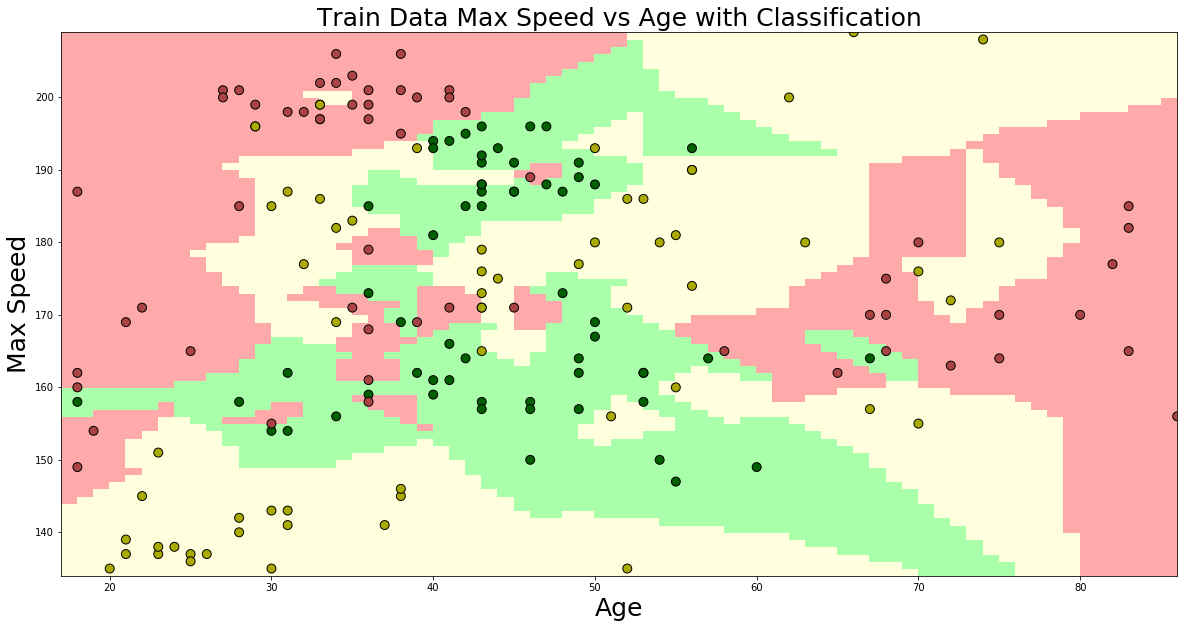

In [15]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

### Look how great it is doing!

In [16]:
clf.score(X_train_2_dim, y_train)

0.9777777777777777

### But really?

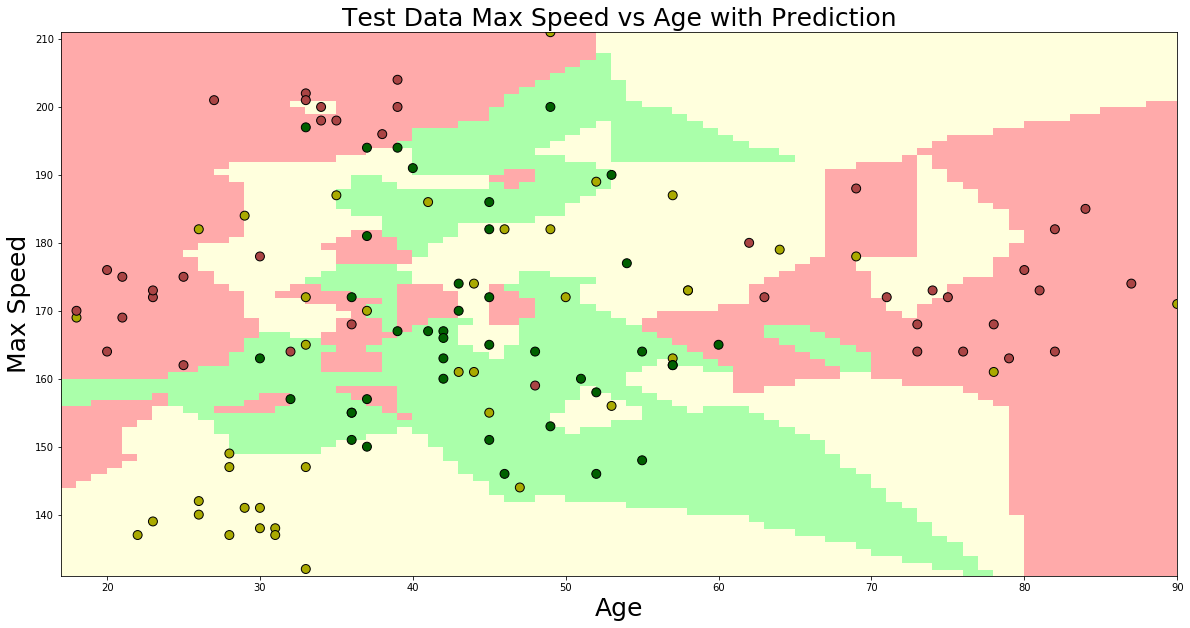

In [17]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [19]:
clf.score(X_test_2_dim, y_test)

0.65

## Cross Validation is a way to make the score more telling
* we run the training and scoring many times (10 in our case)
* each time we use a different part of the data for validation
* this way we have many runs that take out a random factor
* additionally we use all data for training
* only works when training time is reasonably short

In [20]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [38]:
scores = cross_val_score(clf, X[:, :2], y, cv=10)

In [39]:
scores

array([0.63333333, 0.73333333, 0.86666667, 0.56666667, 0.6       ,
       0.83333333, 0.76666667, 0.6       , 0.7       , 0.7       ])

In [40]:
# https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
print("Accuracy: %0.2f (+/- %0.2f for 95 percent of runs)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.19 for 95 percent of runs)
